<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Image%20Classification/Until_Test_Prediction_1_Focusing_on_each_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, Dropout
from tensorflow.keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator

In [48]:
# Import Kaggle.json to make access to download kaggle dataset
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [55]:
# cek active directory
!pwd

/content


In [56]:
# Make directory to move the kaggle.json
!mkdir /content/kaggle

mkdir: cannot create directory ‘/content/kaggle’: File exists


In [57]:
# Move kaggle.json to /kaggle
!mv /content/kaggle.json /content/kaggle/kaggle.json

In [58]:
# Find kaggle.json
!find /content/kaggle -name "kaggle.json"

/content/kaggle/kaggle.json


In [59]:
# Access the permission
!chmod 600 /content/kaggle/kaggle.json

In [60]:
# Download dataset
!kaggle datasets download -d indragenn/fruit-dataset-for-classification

fruit-dataset-for-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [66]:
# Force to download because i have download it before
!rm fruit-dataset-for-classification.zip
!kaggle datasets download -d indragenn/fruit-dataset-for-classification


 97% 110M/113M [00:00<00:00, 299MB/s] 
100% 113M/113M [00:00<00:00, 284MB/s]


In [67]:
# Unzip the file
import zipfile
local_datazip = '/content/fruit-dataset-for-classification.zip'
zip_buka = zipfile.ZipFile(local_datazip, 'r')
zip_buka.extractall('/content')
zip_buka.close()

In [68]:
# Providing TRAIN and TEST path as well as the size of image
TRAIN_PATH = '/content/Dataset/Train'
TEST_PATH = '/content/Dataset/Test'
SIZE = (150, 150)

In [74]:
#Collect the label based on name of the folders
labels = []
for label in os.listdir(TRAIN_PATH):
  labels.append(label)

NUM_LABELS = len(labels)
print(NUM_LABELS)
print(labels)



10
['Rotten_Lemon', 'Fresh_Lime', 'Fresh_Strawberry', 'Rotten_Mango', 'Fresh_Mango', 'Rotten_Lime', 'Fresh_Guava', 'Fresh_Lemon', 'Rotten_Strawberry', 'Rotten Guava']


In [93]:
# Normalisasi dan augmentasi

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_dataset = datagen.flow_from_directory(
                                          directory = TRAIN_PATH,
                                          batch_size = 32,
                                          shuffle = True,
                                          classes = labels,
                                          target_size = SIZE,
                                          subset = 'training',
                                          class_mode = 'categorical')
validation_dataset = datagen.flow_from_directory(
                                          directory = TRAIN_PATH,
                                          batch_size = 32,
                                          target_size = SIZE,
                                          classes = labels,
                                          shuffle = True,
                                          subset = 'validation',
                                          class_mode = 'categorical')



Found 7570 images belonging to 10 classes.
Found 1890 images belonging to 10 classes.


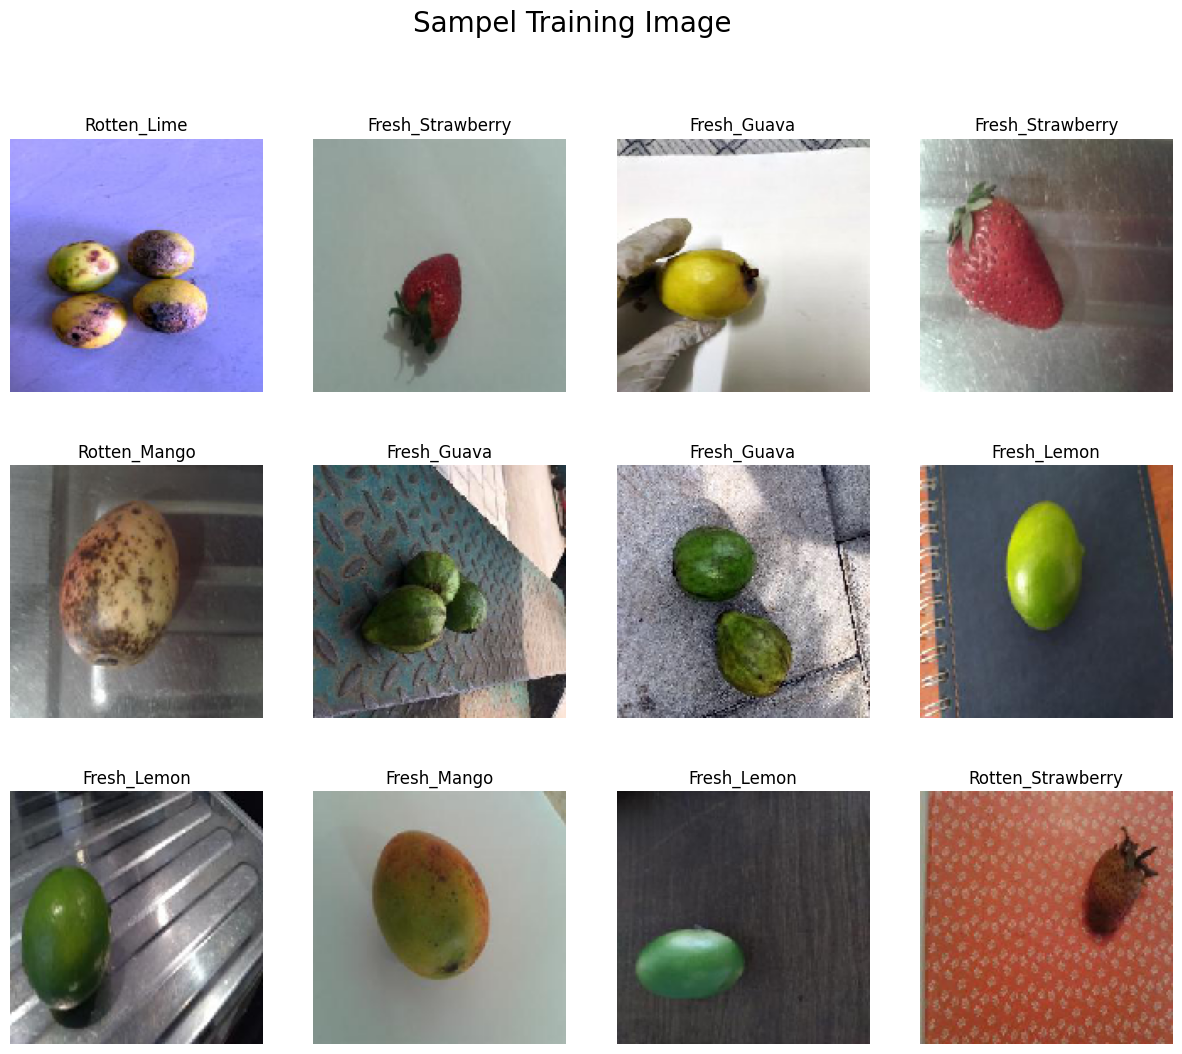

In [94]:
# Display Sample Image with grid and library matplotlib
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
  for j in range(4):
    label = labels[np.argmax(train_dataset[0][1][idx])]
    ax[i, j].set_title(f"{label}")
    ax[i, j].imshow(train_dataset[0][0][idx][:,:,:])
    ax[i, j].axis("off")
    idx += 1

plt.suptitle("Sampel Training Image", fontsize = 20)
plt.show()

In [95]:
# Build Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [99]:
# Model Compile
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Training
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=5)


Epoch 1/5
237/237 [==============================] - 243s 1s/step - loss: 0.1354 - accuracy: 0.9530 - val_loss: 4.8121 - val_accuracy: 0.5677
Epoch 2/5
237/237 [==============================] - 220s 927ms/step - loss: 0.0688 - accuracy: 0.9782 - val_loss: 5.0735 - val_accuracy: 0.6683
Epoch 3/5
237/237 [==============================] - 235s 994ms/step - loss: 0.0296 - accuracy: 0.9900 - val_loss: 6.3239 - val_accuracy: 0.6466
Epoch 4/5
237/237 [==============================] - 229s 965ms/step - loss: 0.0643 - accuracy: 0.9811 - val_loss: 4.7775 - val_accuracy: 0.6058
Epoch 5/5
237/237 [==============================] - 219s 920ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 6.7032 - val_accuracy: 0.6661


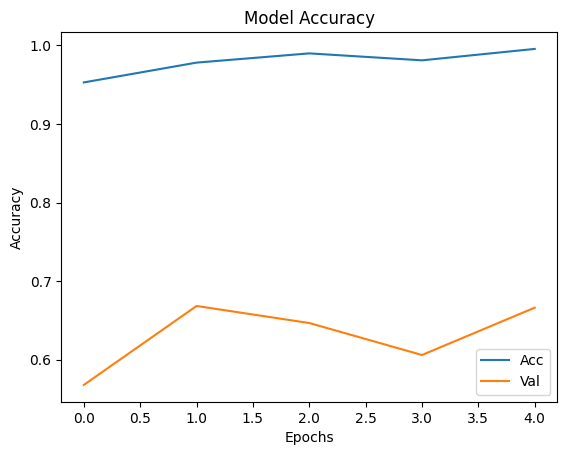

In [100]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

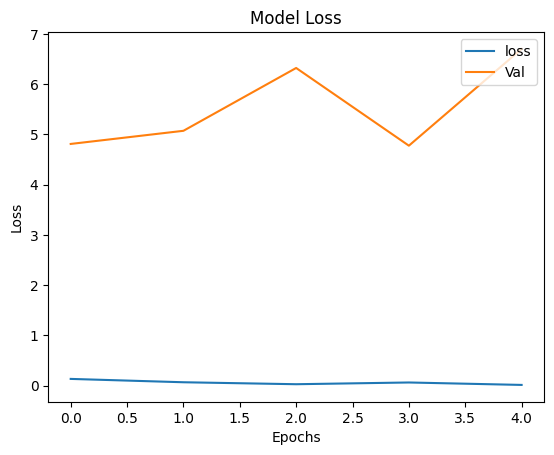

In [101]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')
     